In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
df=pd.read_csv('C:/Users/user/OneDrive/Desktop/insurance.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


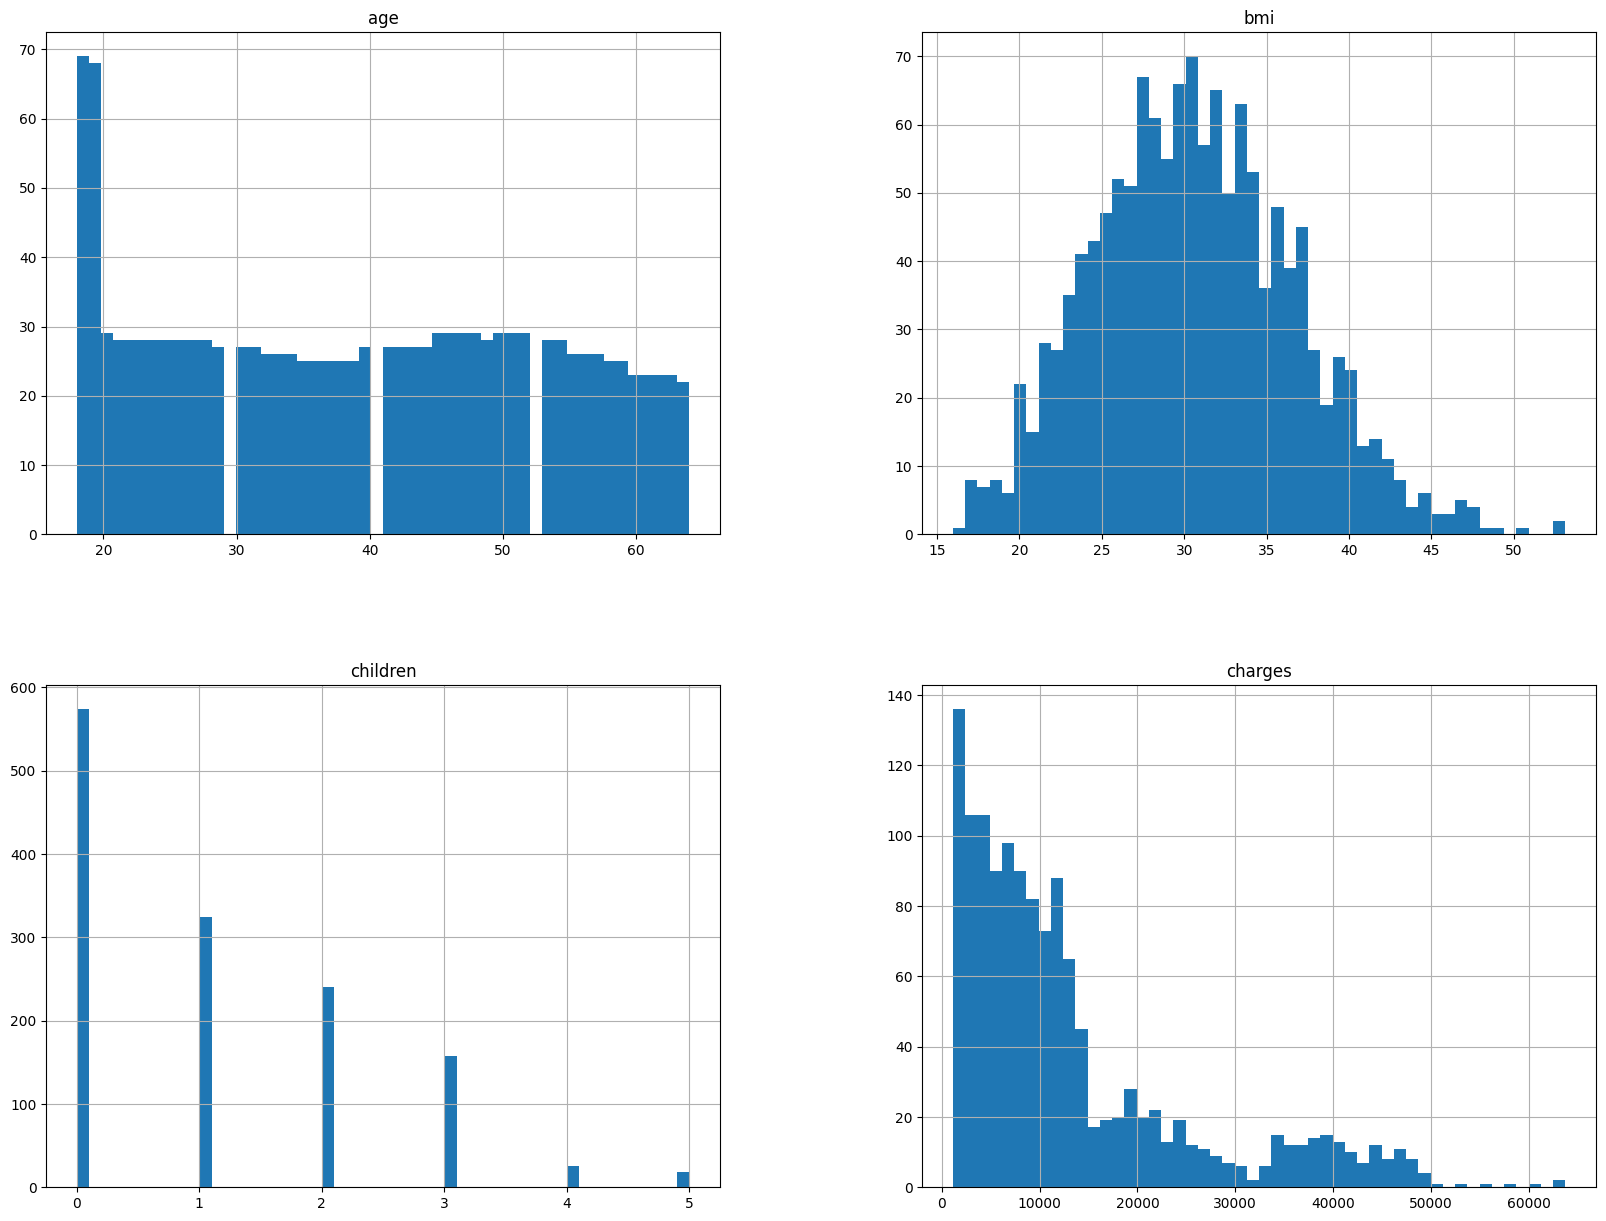

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

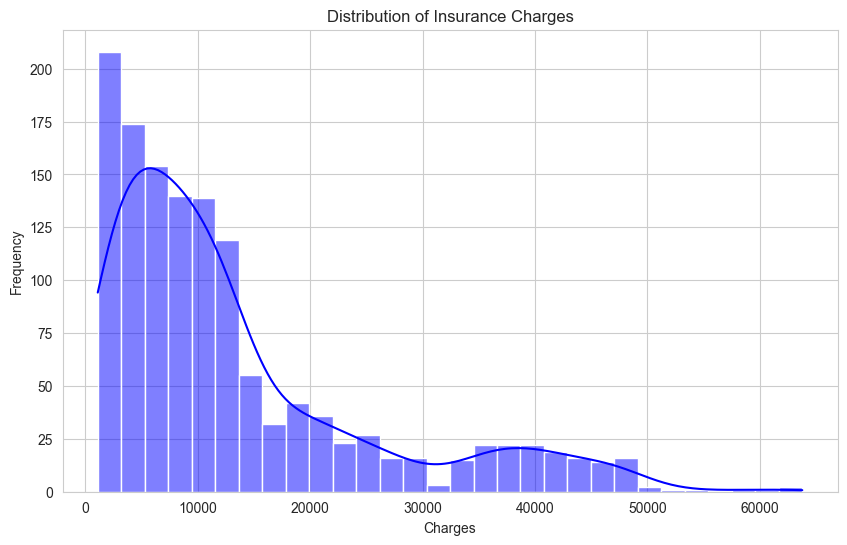

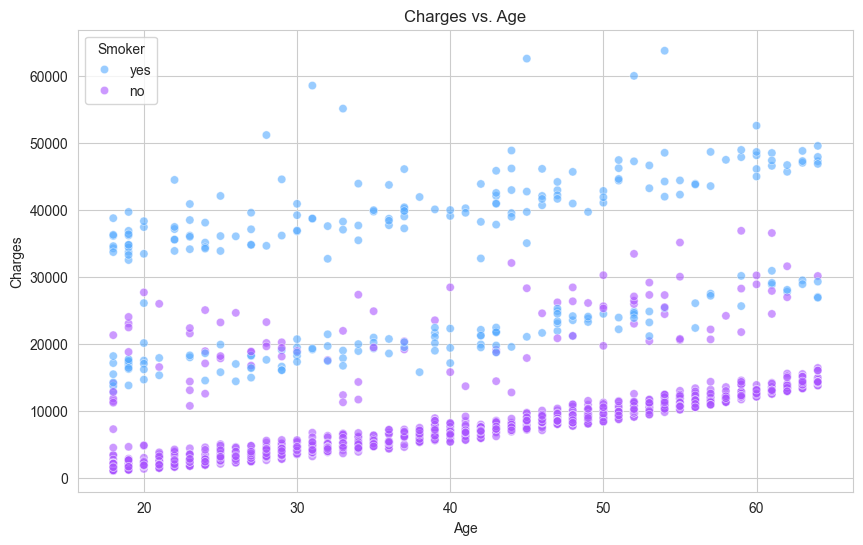

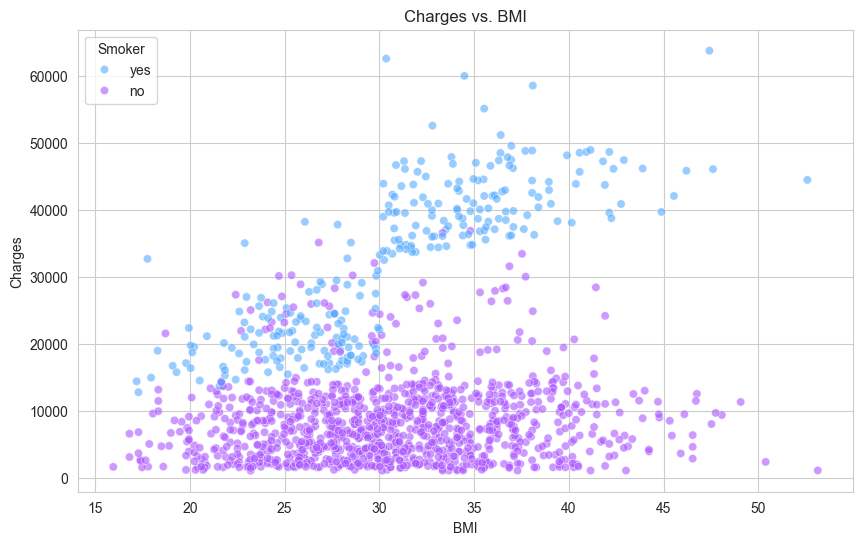

In [12]:
import seaborn as sns

sns.set_style('whitegrid')

# 1. Distribution of Charges
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True, color='blue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# 2. Charges vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette='cool', alpha=0.6)
plt.title('Charges vs. Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker', loc='upper left')
plt.show()

# 3. Charges vs. BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette='cool', alpha=0.6)
plt.title('Charges vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker', loc='upper left')
plt.show()


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


insurance_data_processed = pd.get_dummies(df, drop_first=True)

# Step 2: Splitting the data into features (X) and target (y)
X = insurance_data_processed.drop('charges', axis=1)
y = insurance_data_processed['charges']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Testing the model
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE) and R² score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 4181.194473753654
R² Score: 0.7835929767120723


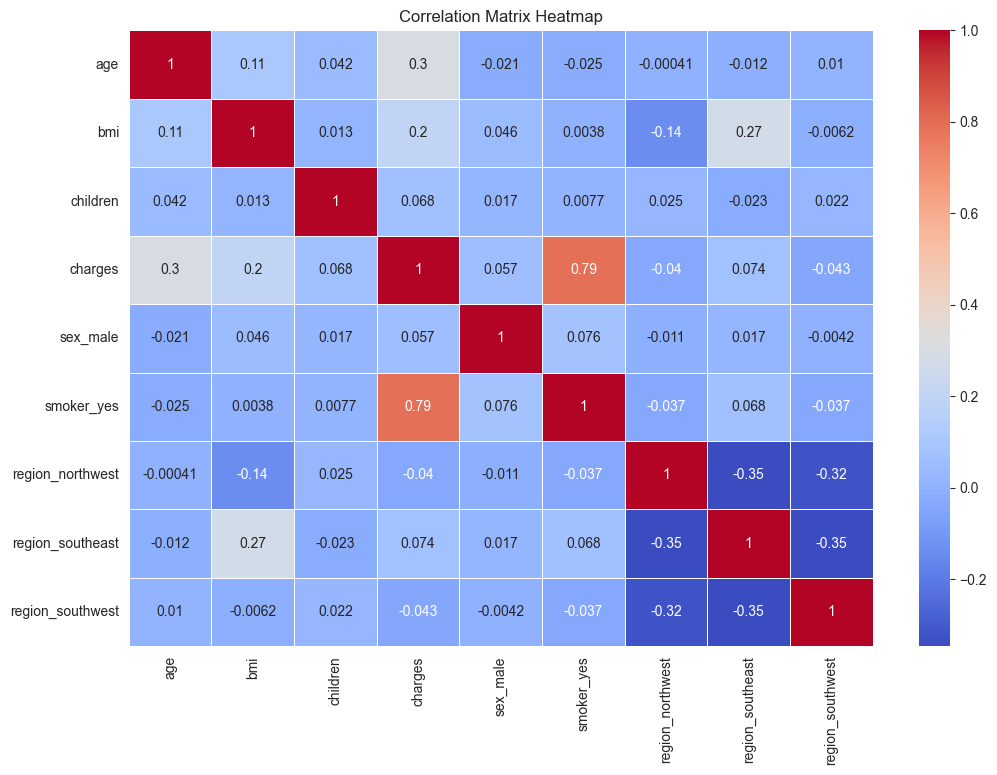

In [15]:
insurance_data_processed = pd.get_dummies(df, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = insurance_data_processed.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:
df['age_bmi'] =df['age'] * df['bmi']
df['bmi_children'] = df['bmi'] * df['children']
df['age_smoker'] = df['age'] * (df['smoker'] == 'yes').astype(int)

# Convert categorical variables into numerical format using one-hot encoding
insurance_data_processed = pd.get_dummies(df, drop_first=True)

# Splitting the data into features (X) and target (y)
X = insurance_data_processed.drop('charges', axis=1)
y = insurance_data_processed['charges']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE) and R² score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE) with new features: {mae}")
print(f"R² Score with new features: {r2}")

Mean Absolute Error (MAE) with new features: 4202.743657271436
R² Score with new features: 0.779365432376407


In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Create new attribute combinations
df['age_bmi'] = df['age'] * df['bmi']
df['bmi_children'] = df['bmi'] * df['children']
df['age_smoker'] = df['age'] * (df['smoker'] == 'yes').astype(int)

# Convert categorical variables into numerical format using one-hot encoding
insurance_data_processed = pd.get_dummies(df, drop_first=True)

# Splitting the data into features (X) and target (y)
X = insurance_data_processed.drop('charges', axis=1)
y = insurance_data_processed['charges']

# Initialize the model
model = LinearRegression()

# Define the scoring metric (Mean Absolute Error in this case)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring=mae_scorer)

# Display the mean and standard deviation of MAE scores
print(f"Cross-Validation Mean Absolute Error (MAE): {-cv_scores.mean():.2f}")
print(f"Cross-Validation MAE Standard Deviation: {cv_scores.std():.2f}")


Cross-Validation Mean Absolute Error (MAE): 4199.50
Cross-Validation MAE Standard Deviation: 80.67


In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer

# Load the dataset


# Feature engineering: Create new attribute combinations
df['age_bmi'] =df['age'] * df['bmi']
df['bmi_children'] = df['bmi'] * df['children']
df['age_smoker'] =df['age'] * (df['smoker'] == 'yes').astype(int)

# Convert categorical variables into numerical format using one-hot encoding
insurance_data_processed = pd.get_dummies(df, drop_first=True)

# Splitting the data into features (X) and target (y)
X = insurance_data_processed.drop('charges', axis=1)
y = insurance_data_processed['charges']

# Step 1: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Adding Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 3: Train and fine-tune the model
# Trying Linear, Ridge, and Lasso Regression
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
}

# Perform cross-validation and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))
    
    print(f"{model_name}:")
    print(f"  Mean Absolute Error (MAE) on Test Set: {mae:.2f}")
    print(f"  Cross-Validation Mean MAE: {cv_scores.mean():.2f}")
    print(f"  Cross-Validation MAE Standard Deviation: {cv_scores.std():.2f}\n")


Linear Regression:
  Mean Absolute Error (MAE) on Test Set: 2747.97
  Cross-Validation Mean MAE: 3093.21
  Cross-Validation MAE Standard Deviation: 237.38

Ridge Regression:
  Mean Absolute Error (MAE) on Test Set: 2741.18
  Cross-Validation Mean MAE: 3072.20
  Cross-Validation MAE Standard Deviation: 218.97



In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Feature engineering: Create new attribute combinations
df['age_bmi'] = df['age'] * df['bmi']
df['bmi_children'] = df['bmi'] * df['children']
df['age_smoker'] = df['age'] * (df['smoker'] == 'yes').astype(int)

# Convert categorical variables into numerical format using one-hot encoding
insurance_data_processed = pd.get_dummies(df, drop_first=True)

# Splitting the data into features (X) and target (y)
X = insurance_data_processed.drop('charges', axis=1)
y = insurance_data_processed['charges']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Adding Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
}

best_model = None
best_mae = float('inf')

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate errors
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_mae = -cv_scores.mean()
    
    # Output the results
    print(f"{model_name}:")
    print(f"  Test Set Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Test Set Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Test Set Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"  R² Score on Test Set: {r2:.2f}")
    print(f"  Cross-Validation Mean MAE: {cv_mae:.2f}\n")
    
    # Track the best model
    if mae < best_mae:
        best_mae = mae
        best_model = model_name

print(f"The best model based on the lowest Mean Absolute Error (MAE) is: {best_model}")


Linear Regression:
  Test Set Mean Absolute Error (MAE): 2747.97
  Test Set Mean Squared Error (MSE): 20437744.99
  Test Set Root Mean Squared Error (RMSE): 4520.81
  R² Score on Test Set: 0.87
  Cross-Validation Mean MAE: 3093.21

Ridge Regression:
  Test Set Mean Absolute Error (MAE): 2741.18
  Test Set Mean Squared Error (MSE): 20442650.28
  Test Set Root Mean Squared Error (RMSE): 4521.35
  R² Score on Test Set: 0.87
  Cross-Validation Mean MAE: 3072.20

The best model based on the lowest Mean Absolute Error (MAE) is: Ridge Regression


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define features (all relevant variables) and target variable (charges)
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df["charges"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: One-hot encode categorical variables (sex, smoker, region)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])],
    remainder='passthrough')  # Keep 'age', 'bmi', and 'children' as is

# Gradient Boosting Regressor Pipeline
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                              ('regressor', GradientBoostingRegressor(random_state=42))])

# Train the model
gb_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_pipeline.predict(X_test)

# Calculate performance metrics
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
mae_gb = mean_absolute_error(y_test, y_pred_gb)

# Display results
print("Gradient Boosting Regressor Performance:")
print(f"R-Squared: {r2_gb}")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"Mean Absolute Error (MAE): {mae_gb}")


Gradient Boosting Regressor Performance:
R-Squared: 0.8794636885872643
Mean Squared Error (MSE): 18713109.445524592
Root Mean Squared Error (RMSE): 4325.865167284412
Mean Absolute Error (MAE): 2402.0240220053965


Gradient Boosting Regressor Performance:
R-Squared: 0.8794636885872643
Mean Squared Error (MSE): 18713109.445524592
Root Mean Squared Error (RMSE): 4325.865167284412
Mean Absolute Error (MAE): 2402.0240220053965


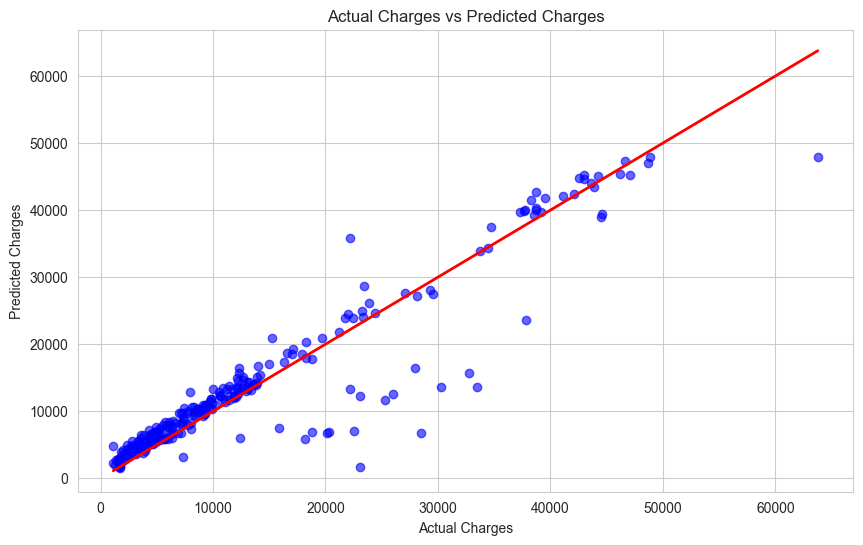

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


# Define features (all relevant variables) and target variable (charges)
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df["charges"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: One-hot encode categorical variables (sex, smoker, region)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])],
    remainder='passthrough')  # Keep 'age', 'bmi', and 'children' as is

# Gradient Boosting Regressor Pipeline
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                              ('regressor', GradientBoostingRegressor(random_state=42))])

# Train the model
gb_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_pipeline.predict(X_test)

# Calculate performance metrics
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
mae_gb = mean_absolute_error(y_test, y_pred_gb)

# Display results
print("Gradient Boosting Regressor Performance:")
print(f"R-Squared: {r2_gb}")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"Mean Absolute Error (MAE): {mae_gb}")

# Create a scatter plot comparing actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line for perfect prediction
plt.title('Actual Charges vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()
